In [1]:
# Importing all the required libraries

import mysql.connector 
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string

In [2]:
# Connecting to database
cnx = mysql.connector.connect(host='relational.fit.cvut.cz',
                             password='relational',
                             user='guest',
                             database='stats',use_pure=True)

In [3]:
cursor = cnx.cursor()

In [4]:
sql_select_Query = "select * from comments"

In [5]:
# Creating dataframe from table 
result_dataFrame = pd.read_sql(sql_select_Query,cnx)
cnx.close() #

In [6]:
# Displaying Dataframe 
result_dataFrame

,Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName
0,1,3,5,Could be a poster child fo argumentative and s...,2010-07-19 19:15:52,13.0,None
1,2,5,0,"Yes, R is nice- but WHY is it 'valuable'.",2010-07-19 19:16:14,13.0,None
2,3,9,0,Again- why? How would I convince my boss to u...,2010-07-19 19:18:54,13.0,None
3,4,5,11,"It's mature, well supported, and a standard wi...",2010-07-19 19:19:56,37.0,None
4,5,3,1,"Define ""valuable""...",2010-07-19 19:20:28,5.0,None
...,...,...,...,...,...,...,...
174300,221288,52312,0,You and Bogdanovist are in disagreement when y...,2014-09-14 01:45:11,13564.0,None
174301,221289,115376,0,"@gung goal would be to say ""Videos on this cha...",2014-09-14 01:45:19,55746.0,None
174302,221290,52312,0,Especially for small datasets where maybe leav...,2014-09-14 01:47:33,13564.0,None
174303,221291,115374,0,"In fact, odds of 1-1 are said to be _even_, ar...",2014-09-14 01:49:32,6633.0,None


In [7]:
result_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174305 entries, 0 to 174304
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               174305 non-null  int64         
 1   PostId           174305 non-null  int64         
 2   Score            174305 non-null  int64         
 3   Text             174305 non-null  object        
 4   CreationDate     174305 non-null  datetime64[ns]
 5   UserId           171470 non-null  float64       
 6   UserDisplayName  2831 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 9.3+ MB


### Data Processing

In [8]:
## Change the reviews type to string
result_dataFrame['Text'] = result_dataFrame['Text'].astype(str)
result_dataFrame['Text'][2]

'Again- why?  How would I convince my boss to use this over, say, Excel.'

In [9]:
## Lowercase all reviews
result_dataFrame['Text'] = result_dataFrame['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
result_dataFrame['Text'][2]

'again- why? how would i convince my boss to use this over, say, excel.'

In [10]:
## remove punctuation
result_dataFrame['Text'] = result_dataFrame['Text'].str.replace(r"[,.;@#?!&$-]+",'')
result_dataFrame['Text'][2]

'again why how would i convince my boss to use this over say excel'

In [11]:
stop = stopwords.words('english')
result_dataFrame['Texmt'] = result_dataFrame['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
result_dataFrame['Text'][2]

'again why how would i convince my boss to use this over say excel'

In [12]:
st = PorterStemmer()
result_dataFrame['Text'] = result_dataFrame['Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
result_dataFrame['Text'][2]

'again whi how would i convinc my boss to use thi over say excel'

In [13]:
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

result_dataFrame['senti_score'] = result_dataFrame['Text'].apply(senti)


As it can be observed there are two scores: the first score is sentiment polarity which tells if the sentiment is positive or negative and the second score is subjectivity score to tell how subjective is the text.



In [14]:
result_dataFrame['senti_score_polarity'] = ''
for i in range(len(result_dataFrame['senti_score'])):
    result_dataFrame['senti_score_polarity'][i] = result_dataFrame['senti_score'][i].polarity

<ipython-input-14-e92068ff6df9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_dataFrame['senti_score_polarity'][i] = result_dataFrame['senti_score'][i].polarity


In [15]:
result_dataFrame['senti_score_polarity'] = result_dataFrame['senti_score_polarity'].astype(float)

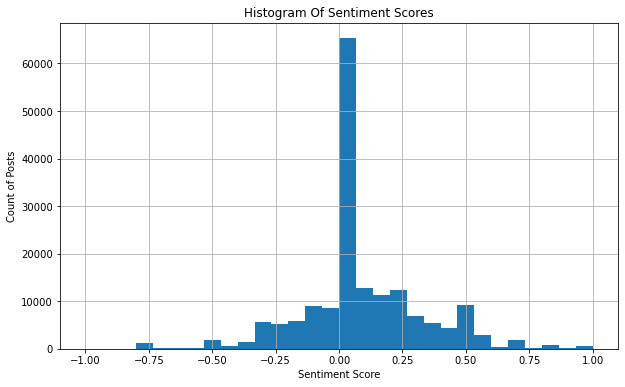

In [18]:
result_dataFrame.hist(column='senti_score_polarity', bins = 30, figsize=(10,6));
plt.title('Histogram Of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel("Count of Posts");


In [19]:
result_dataFrame.to_csv('Comments_sentiment_Score.csv', index = False)